In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Opening up the 4 data files
customers = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [3]:
#First Glance at the Data.
customers.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


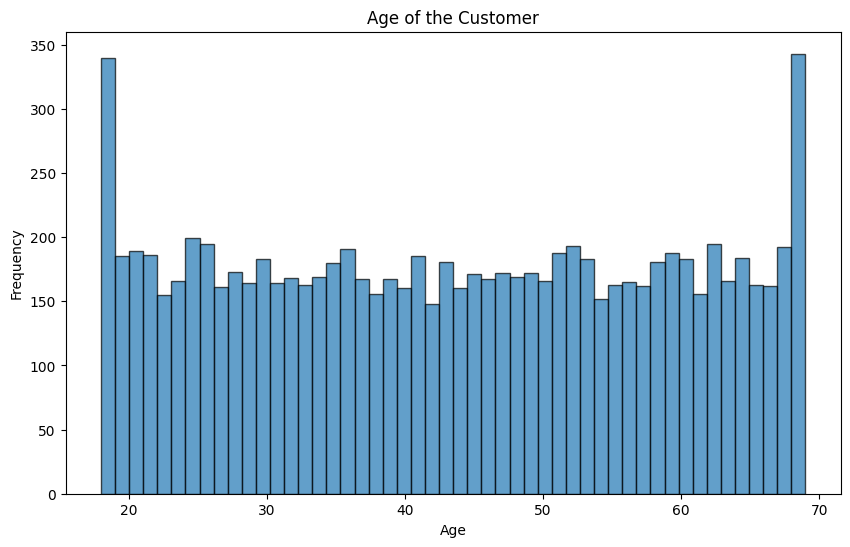

In [5]:
#Visualizing "Age" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(customers['age'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Age of the Customer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

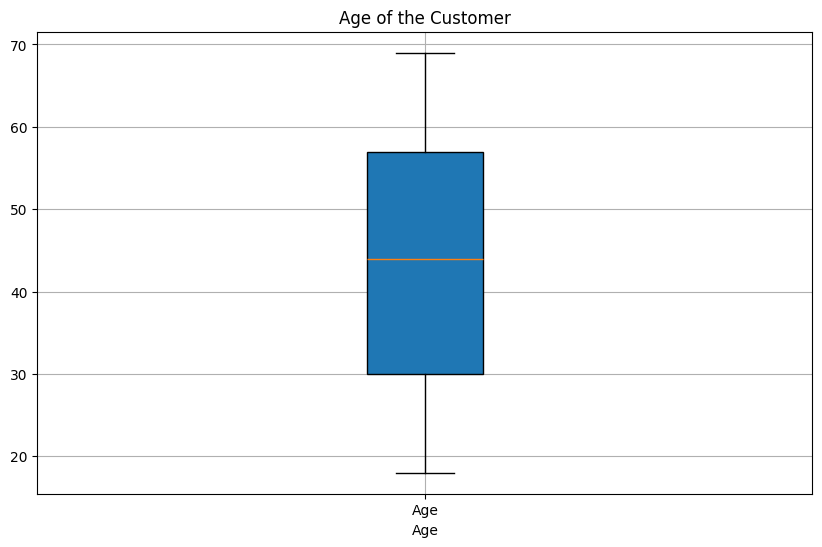

In [6]:
#Visualizing "Age" using Boxplots without any missing values 
plt.figure(figsize=(10, 6))
plt.boxplot(customers['age'].dropna(), vert=True, patch_artist=True, labels=['Age'])
plt.title('Age of the Customer')
plt.xlabel('Age')
plt.grid(True)
plt.show()

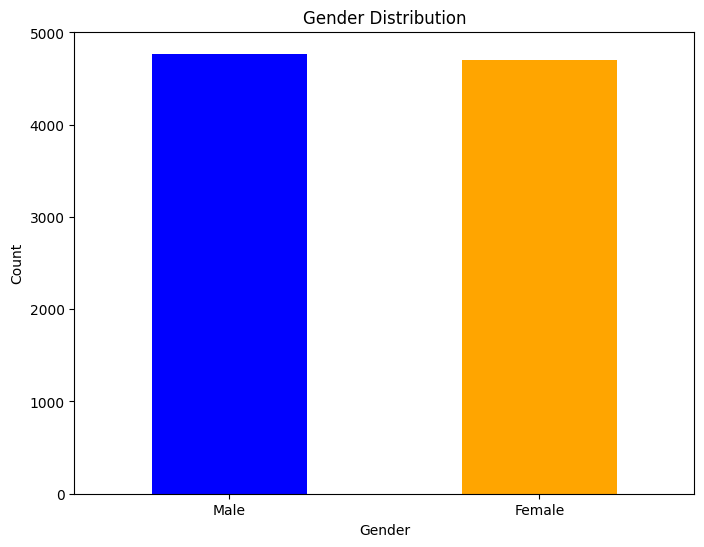

In [7]:
#Visualizing "Gender" using Barplot
gender_counts = customers['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
engagement.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [9]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


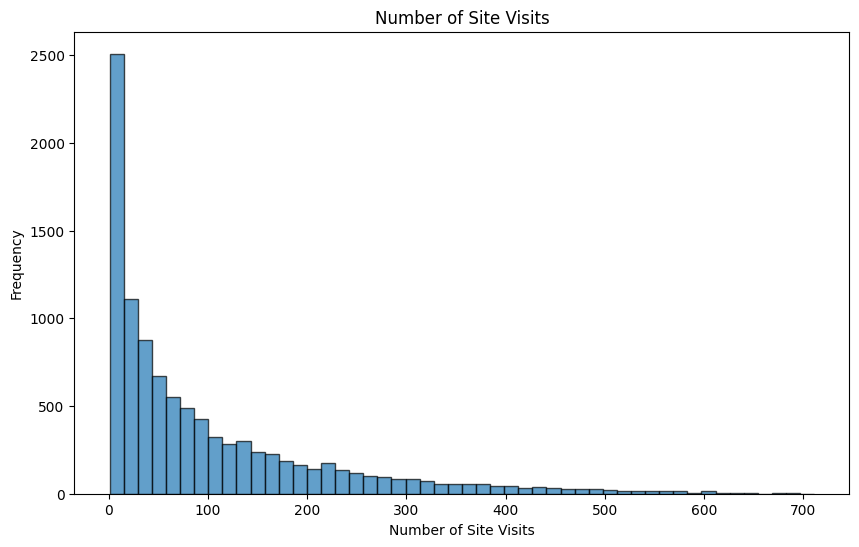

In [10]:
#Visualizing "Number of Site Visits" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(engagement['number_of_site_visits'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Site Visits')
plt.xlabel('Number of Site Visits')
plt.ylabel('Frequency')
plt.show()

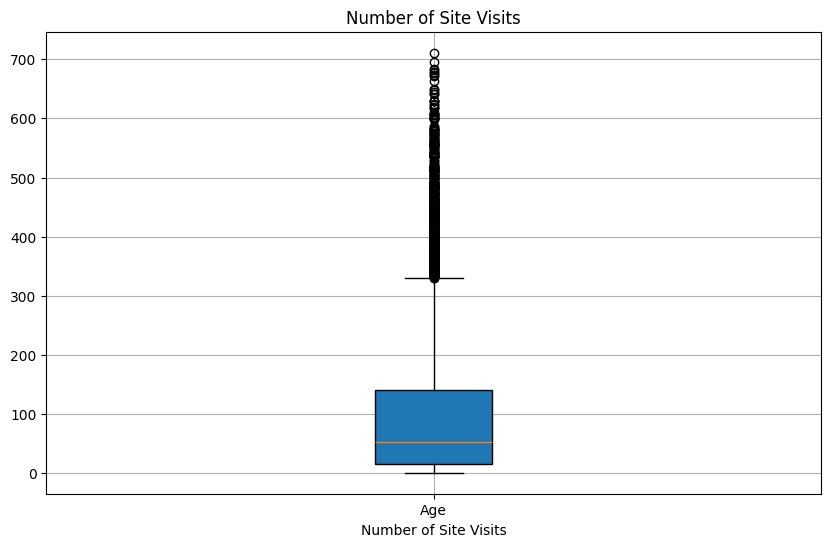

In [11]:
#Visualizing Boxplot for "Number of Sites Visisted" to identify the median, quartiles, and potential outliers in the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(engagement['number_of_site_visits'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Number of Site Visits')
plt.xlabel('Number of Site Visits')
plt.grid(True)
plt.show()

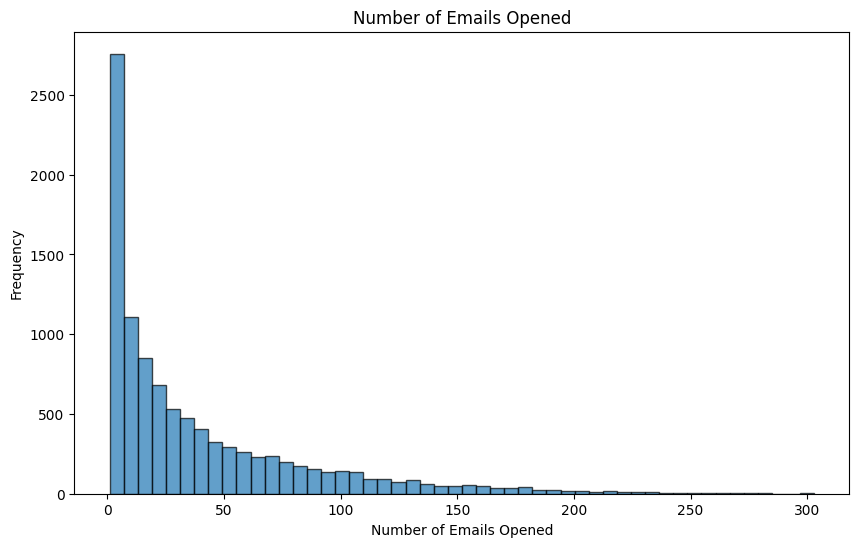

In [12]:
#Visualizing "Number of Emails Opened" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(engagement['number_of_emails_opened'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Emails Opened')
plt.xlabel('Number of Emails Opened')
plt.ylabel('Frequency')
plt.show()

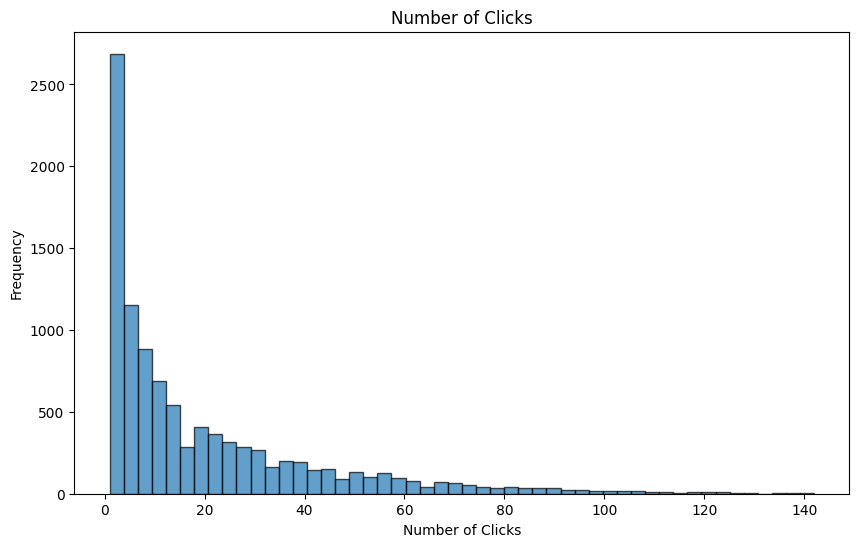

In [13]:
#Visualizing "Number of Clicks" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(engagement['number_of_clicks'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Number of Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')
plt.show()

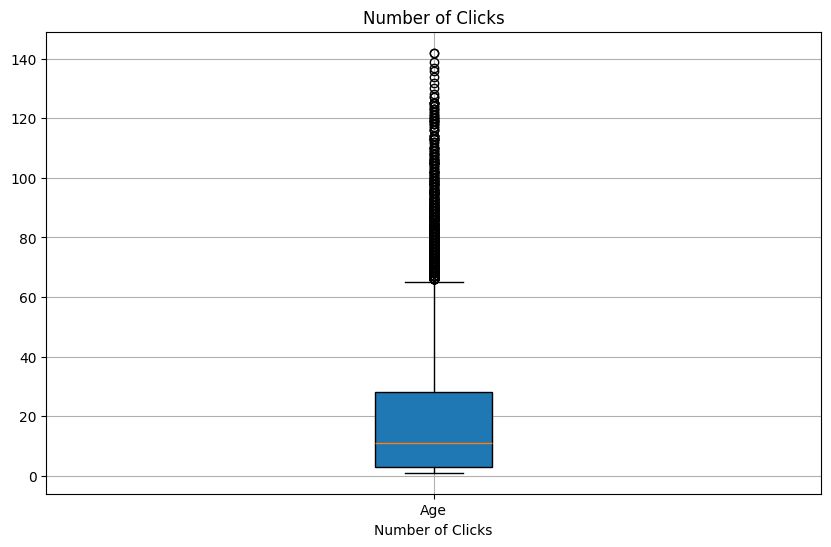

In [14]:
#Visualizing Boxplot for "Number of Clicks" to identify the median, quartiles, and potential outliers in the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(engagement['number_of_clicks'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Number of Clicks')
plt.xlabel('Number of Clicks')
plt.grid(True)
plt.show()

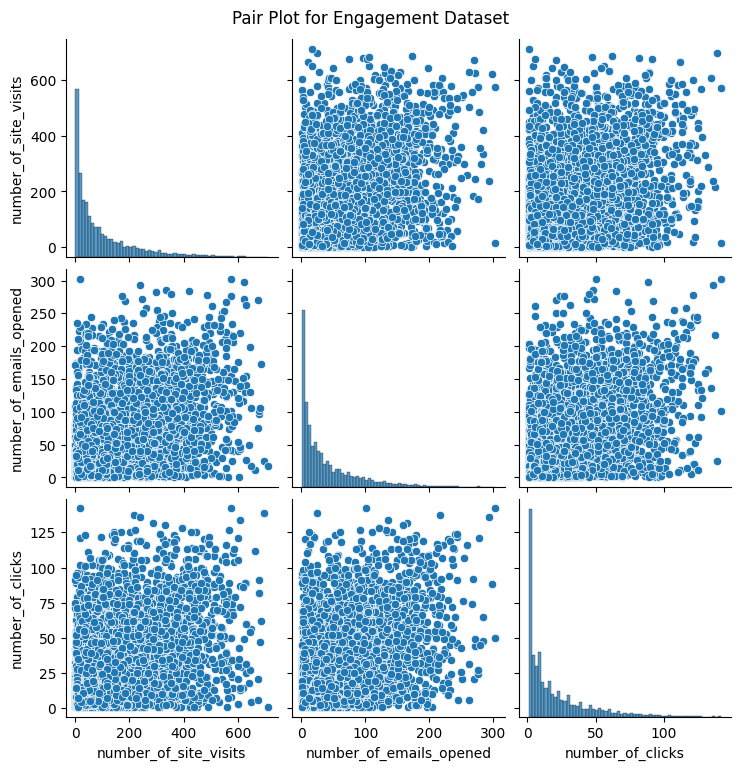

In [15]:
#Using Pairplot to display scatter plots for all possible pairs
sns.pairplot(engagement, vars=['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks'])
plt.suptitle('Pair Plot for Engagement Dataset', y=1.02)
plt.show()

In [16]:
marketing.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [17]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


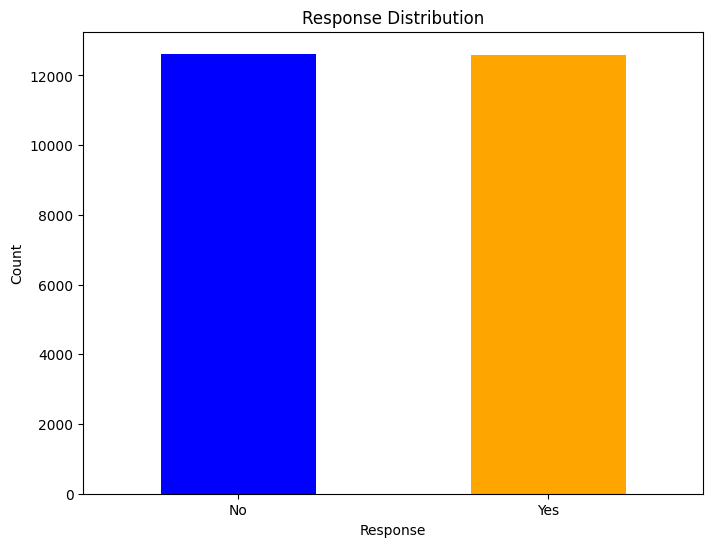

In [18]:
#Visualizing "Response" using Barplot
response_counts = marketing['response'].value_counts()

plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Response Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

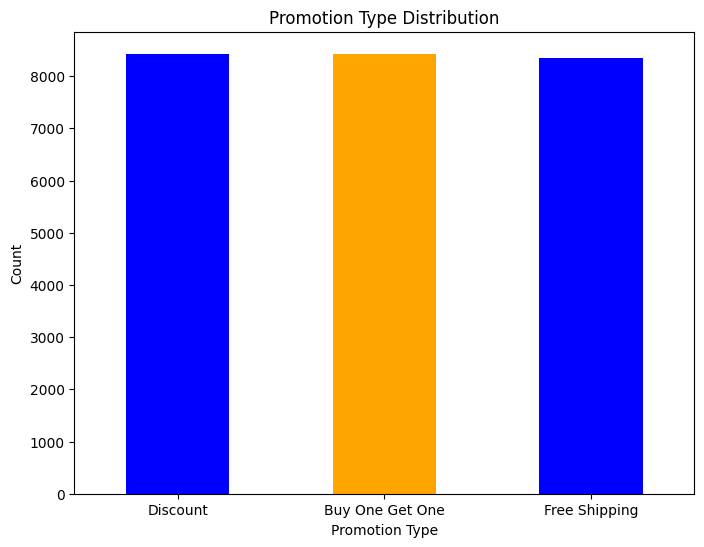

In [19]:
#Visualizing "Response" using Barplot
promotion_type_counts = marketing['promotion_type'].value_counts()

plt.figure(figsize=(8, 6))
promotion_type_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Promotion Type Distribution')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

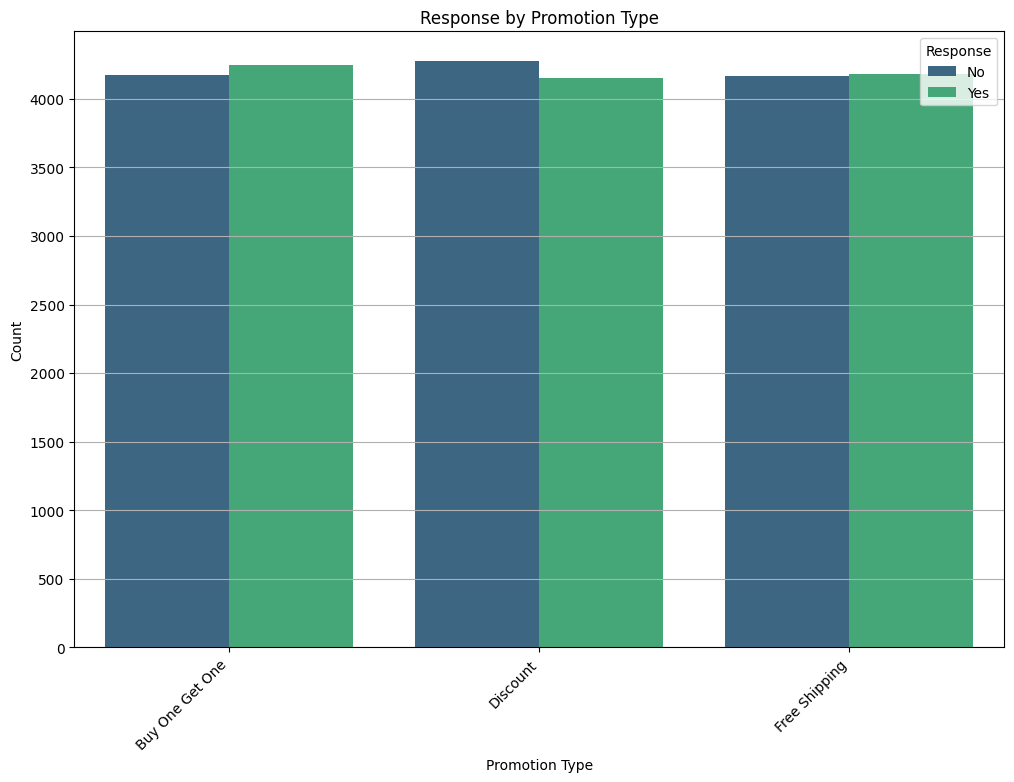

In [20]:
#Using Grouped Bar Chart to count the proportion of responses for each promotion type.
plt.figure(figsize=(12, 8))
sns.countplot(data=marketing, x='promotion_type', hue='response', palette='viridis')
plt.title('Response by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.legend(title='Response')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [21]:
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [22]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


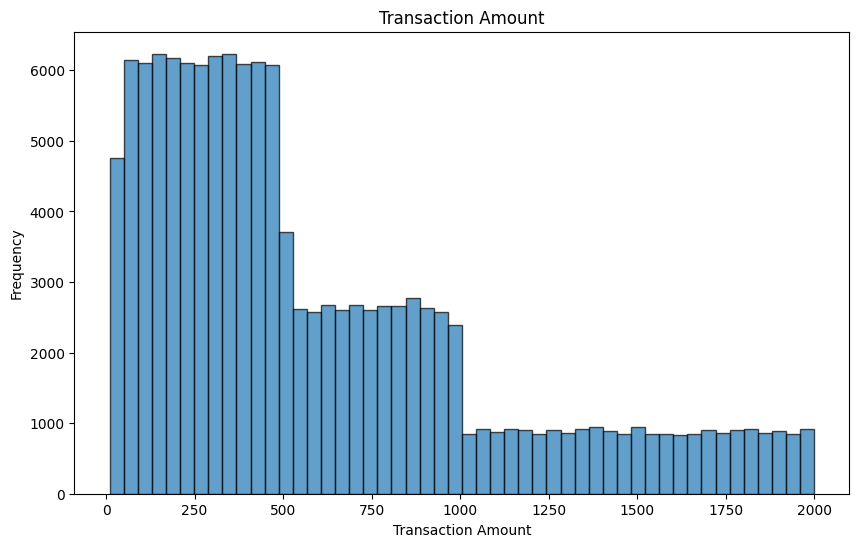

In [23]:
#Visualizing "Transaction Amount" using histogram to identify any abnormalities
plt.figure(figsize=(10, 6))
plt.hist(transactions['transaction_amount'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

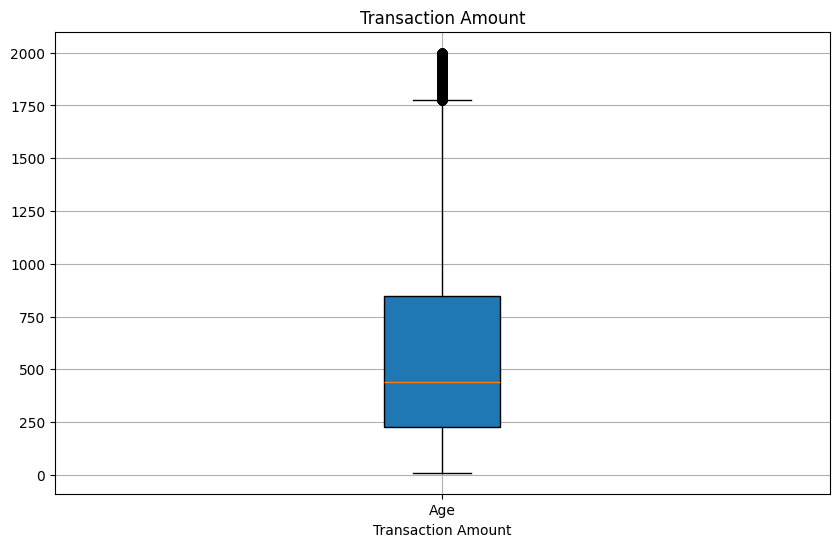

In [24]:
#Visualizing Boxplot for "Transaction Amount" to identify the median, quartiles, and potential outliers in the distribution
plt.figure(figsize=(10, 6))
plt.boxplot(transactions['transaction_amount'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Transaction Amount')
plt.xlabel('Transaction Amount')
plt.grid(True)
plt.show()

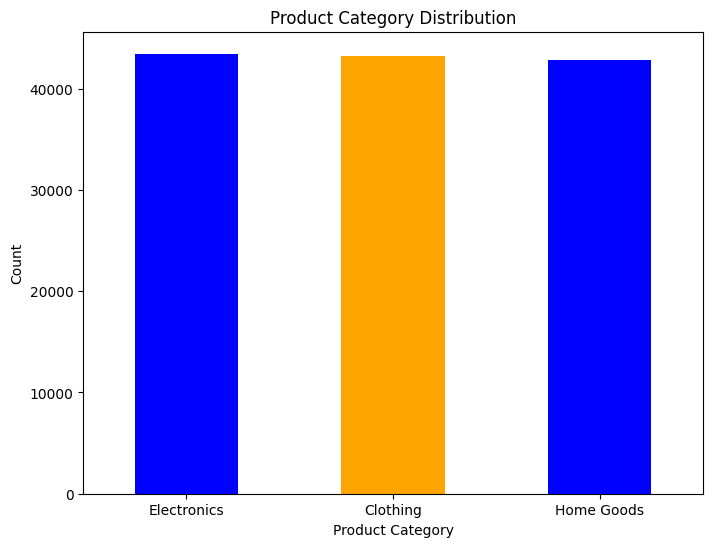

In [25]:
#Visualizing "Product Category" using Barplot
product_category_counts = transactions['product_category'].value_counts()

plt.figure(figsize=(8, 6))
product_category_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

/var/folders/0h/mz4ht1jx3db5k740465q827h0000gn/T/ipykernel_36226/1746473223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=transactions, x='product_category', y='transaction_amount', palette='Set3')


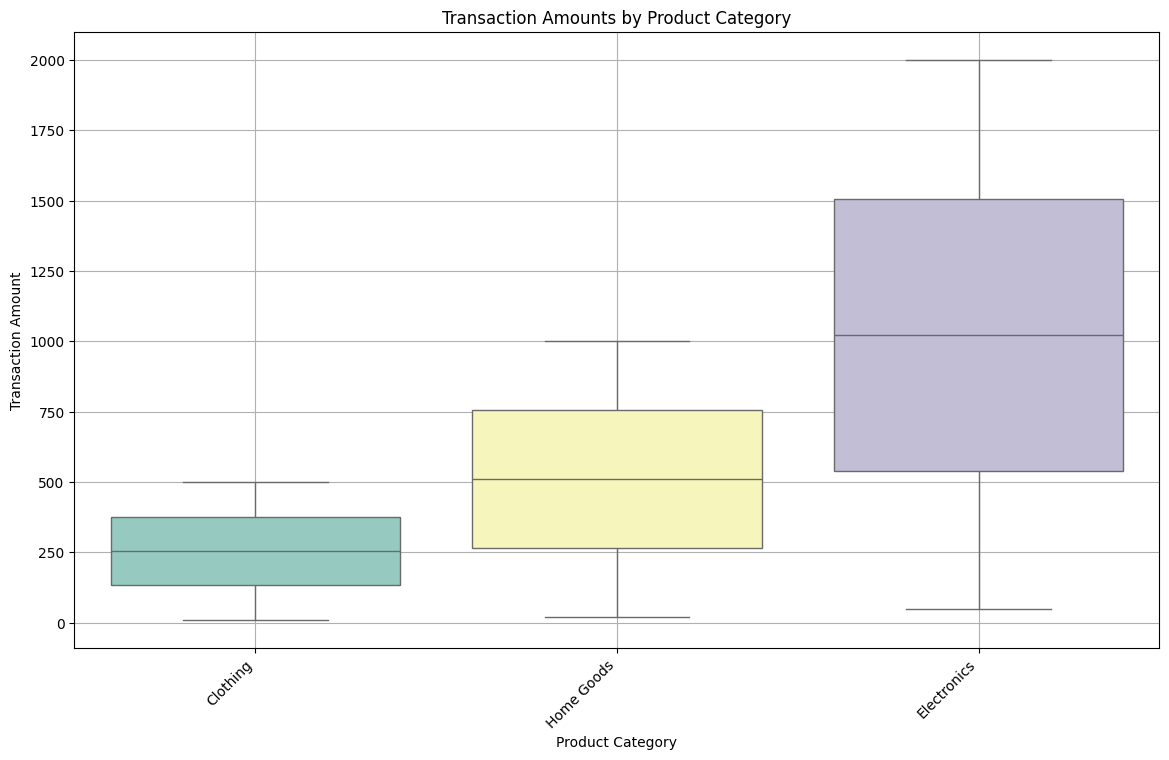

In [26]:
#Using Boxplot to compare the distribution of transaction amounts across different product categories
plt.figure(figsize=(14, 8))
sns.boxplot(data=transactions, x='product_category', y='transaction_amount', palette='Set3')
plt.title('Transaction Amounts by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [29]:
customers['join_date'] = pd.to_datetime(customers['join_date']) 
customers['last_purchase_date'] = pd.to_datetime(customers['last_purchase_date']) 
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date']) 
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

In [30]:
customers['customer_lifetime'] = (customers['last_purchase_date'] - customers['join_date']).dt.days
total_spending = transactions.groupby('customer_id')['transaction_amount'].sum().reset_index()
total_spending.columns = ['customer_id', 'total_spending']

In [33]:
avg_transaction_value = transactions.groupby('customer_id')['transaction_amount'].mean().reset_index() 
avg_transaction_value.columns = ['customer_id', 'avg_transaction_value']

In [34]:
transaction_count = transactions.groupby('customer_id')['transaction_id'].count().reset_index() 
transaction_count.columns = ['customer_id', 'transaction_count']

In [38]:
response_rate = marketing.groupby('customer_id')['response'].apply(lambda x: (x == 'Yes').mean()).reset_index()
response_rate.columns = ['customer_id', 'response_rate']

In [43]:
# calculate the engagement metrics
engagement_metrics = engagement.groupby('customer_id').agg({
    'number_of_site_visits': 'sum',
    'number_of_emails_opened': 'sum',
    'number_of_clicks': 'sum'
}).reset_index()

In [45]:
data = customers.merge(total_spending, on='customer_id', how='left')
data = data.merge(avg_transaction_value, on='customer_id', how='left')
data = data.merge(transaction_count, on='customer_id', how='left')
data = data.merge(engagement, on='customer_id', how='left')
data = data.merge(response_rate, on='customer_id', how='left')

In [46]:
from sklearn.preprocessing import StandardScaler
# Selected feature to normalize
features_to_normalize = ['age', 'customer_lifetime', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']
scaler = StandardScaler()
print(data.head())

   customer_id  join_date last_purchase_date   age  gender           location  \
0            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   
1            2 2021-09-08         2023-10-25   NaN    Male          Hillville   
2            3 2021-06-01         2022-11-27   NaN     NaN   North Latoyatown   
3            4 2022-01-01         2022-09-01  29.0    Male          Grossstad   
4            5 2022-01-24         2023-06-02   NaN    Male   East Matthewfort   

   customer_lifetime  total_spending  avg_transaction_value  \
0                118         3509.48             584.913333   
1                777         6081.32             675.702222   
2                544         1454.87             242.478333   
3                243         7874.68             393.734000   
4                494        15524.55             646.856250   

   transaction_count  number_of_site_visits  number_of_emails_opened  \
0                  6                     10                   

In [50]:
features = data[['age', 'customer_lifetime', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']] 
target = data['total_spending']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)